<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/Qualificacao/Histograma_Final/PSD_histogram_CNN_B_Amostra3_r_squared_set_9_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [ ]:
!pip install mahotas

In [ ]:
import mahotas.features.texture as mht
import mahotas.features

In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_fev_2020


In [ ]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip' 
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 414, done.
remote: Counting objects: 100% (164/164), done.
remote: Compressing objects: 100% (163/163), done.
remote: Total 414 (delta 70), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (414/414), 165.62 MiB | 28.54 MiB/s, done.
Resolving deltas: 100% (193/193), done.
Checking out files: 100% (82/82), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_fev_2020/Doutorado


In [ ]:
labels =[]
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)
print(labels)

['Fotos_Grandes-3cdAmostra/Q6-8-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-1.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-1.jpg', 'Fotos_Grandes-3cdAmostr

In [ ]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[4] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [ ]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 163 (delta 65), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 22.13 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [ ]:
from segment_filter_not_conclude import Segmenta  # got image provided segmented

In [ ]:
df=Segmenta(img)
Img_Size = 28

In [ ]:
print(df)

    Width           0           1  ...         781         782         783
0     169  204.691132  202.333740  ...  175.423401  174.197296  179.782242
1     175  162.678375  178.905579  ...  178.294388  150.742401  120.387199
2     176  193.907532  185.662186  ...  132.257217  137.289764  143.347610
3     141  182.239990  188.042282  ...  137.020218  120.394257   98.208847
4     109  163.498611  179.412079  ...  167.349304  189.258545  208.610291
5     177  110.681267  127.315964  ...  155.879791  168.057755  175.063339
6     125  113.056007  122.395912  ...  135.351746  124.916550  117.979080
7     182  164.349121  175.224869  ...  185.142029  192.532562  221.242645
8     157  116.019554  121.931679  ...  151.203705  139.459732  100.625381
9     186  146.540298  140.680206  ...    1.335646    0.187421    1.346398
10    146  228.697311  229.509842  ...  173.879730  175.464249  170.906921
11    100  230.011200  242.521606  ...   50.518402   78.248001  104.119995
12    182  113.911255  11

In [ ]:
'''
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines
# filename = 'model_ANN.pkl'
filename = 'model_ANN_new.pkl'
model = joblib.load(filename)
'''

"\n!git clone https://github.com/ucfilho/MarquesGabi_Routines\n%cd MarquesGabi_Routines\n# filename = 'model_ANN.pkl'\nfilename = 'model_ANN_new.pkl'\nmodel = joblib.load(filename)\n"

In [ ]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 163 (delta 65), reused 3 (delta 1), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 24.29 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [ ]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [ ]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [ ]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = '3 layers of Convolution: 64, 128, 256 '
N1 = 20
N2 = 20

# make the CNN
model = Sequential()
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=256, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=N1))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:

# training the model
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), 
              epochs=200, batch_size=32)

Epoch 1/200
11/11 [==============================] - 2s 140ms/step - loss: 0.6555 - accuracy: 0.6851 - val_loss: 0.6933 - val_accuracy: 0.4898
Epoch 2/200
11/11 [==============================] - 1s 118ms/step - loss: 0.4249 - accuracy: 0.7901 - val_loss: 0.6930 - val_accuracy: 0.5102
Epoch 3/200
11/11 [==============================] - 1s 118ms/step - loss: 0.2732 - accuracy: 0.8921 - val_loss: 0.6928 - val_accuracy: 0.5102
Epoch 4/200
11/11 [==============================] - 1s 121ms/step - loss: 0.1600 - accuracy: 0.9388 - val_loss: 0.6927 - val_accuracy: 0.5102
Epoch 5/200
11/11 [==============================] - 1s 121ms/step - loss: 0.1238 - accuracy: 0.9650 - val_loss: 0.6927 - val_accuracy: 0.5102
Epoch 6/200
11/11 [==============================] - 1s 120ms/step - loss: 0.1200 - accuracy: 0.9534 - val_loss: 0.6928 - val_accuracy: 0.5102
Epoch 7/200
11/11 [==============================] - 1s 116ms/step - loss: 0.0762 - accuracy: 0.9708 - val_loss: 0.6932 - val_accuracy: 0.5102

In [ ]:
Y_test = yback(Y_test)

In [ ]:
# pred_test= model.predict_classes(X_test)
pred_test = np.argmax(model.predict(X_test), axis=-1)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

Predict   0   1
Actual         
0        71   1
1         3  72


In [ ]:
pred_test

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [ ]:
cont = 0; num =25
img_graos = []
Width_new = []
img=ww[4] 
while( cont < num):
  df=Segmenta(img)
  df_ann =df.copy()
  Width = df['Width']
  del df_ann['Width']
  result = np.array(df_ann)
  result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
  #prediction = model.predict_classes(result)
  prediction= np.argmax(model.predict(result), axis=-1)
  loc_grao =[];k=0
  for i in prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      Width_new.append(Width.iloc[k])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

    Width           0           1  ...         781         782         783
4   169.0  161.130905  152.162445  ...  139.152344  150.631836  150.875381
7   153.0  140.016541  142.684830  ...  192.382660  196.781845  196.238129
11  142.0  176.223953  154.511200  ...  143.704834  162.581635  157.849243
14  128.0  182.095703  188.249023  ...  121.837891  133.629883  157.823242
15  182.0  139.739670  131.443787  ...  179.982269  177.023666  151.532547
18  119.0  105.671288  102.141869  ...  139.083054  142.941177  141.653992
19  118.0  209.326050  204.869293  ...  161.045685  159.618790  171.819885
21  165.0  252.144318  247.891479  ...  146.588623  120.728485  171.728897
23  168.0  155.138885  154.583328  ...  116.527779  116.833336  143.500000
25  115.0  208.045135  175.759323  ...  152.755829  153.669037  152.564453
32  150.0  127.668266  131.744003  ...  190.252274  177.184357  177.326584
37  166.0  162.587891  165.190872  ...  225.170700  252.272141  252.284653
40  173.0  120.947937  14

In [ ]:
Width=np.array(Width_new)

In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 687, done.
remote: Counting objects: 100% (448/448), done.
remote: Compressing objects: 100% (446/446), done.
remote: Total 687 (delta 282), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (687/687), 5.59 MiB | 13.23 MiB/s, done.
Resolving deltas: 100% (419/419), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020
#!git clone https://github.com/marquesgabi/Doutorado
%cd marquesgabi_out_2020
#%cd Doutorado
#PSD_imageJ = 'Amostra7.csv' 
#PSD_new = pd.read_csv(PSD_imageJ,sep=';')
#encoding='utf8'

PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))

Cloning into 'marquesgabi_out_2020'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 146 (delta 75), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (146/146), 1.00 MiB | 3.53 MiB/s, done.
Resolving deltas: 100% (75/75), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020
   Juntas   Area
0       1  2.001
1       2  0.820
2       3  1.270


In [ ]:
PSD_new.shape

(95, 2)

In [ ]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [ ]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
4,169.0,161.130905,152.162445,148.640076,137.798889,128.561600,130.872849,126.796196,122.715515,141.776199,154.142075,150.951599,145.922638,139.733795,136.969940,137.136230,140.028275,136.636154,110.701057,63.819645,90.663239,131.916626,155.619019,147.192444,154.713974,206.772385,214.731033,212.560135,216.139420,144.953873,147.407013,150.034454,143.072495,129.205414,131.400284,128.078552,126.741776,141.998322,154.944138,147.260422,...,178.662186,176.093918,180.368347,180.863159,170.332581,157.239136,153.908264,125.549316,122.077446,137.868896,145.461197,149.194550,204.588089,204.530243,203.799530,192.729202,175.749786,231.238174,250.519516,251.137009,249.647476,249.969940,248.039032,248.421371,250.738174,247.071136,241.639648,233.543839,187.268677,180.771133,187.165604,185.425598,183.308731,176.186371,162.766922,131.620529,124.196281,139.152344,150.631836,150.875381
7,153.0,140.016541,142.684830,144.865280,151.376190,139.293747,147.815659,191.846970,239.585037,249.305832,245.560028,197.859039,159.591293,174.493073,193.069168,185.711578,181.393585,172.545731,161.697952,153.236969,155.282761,151.434753,148.119522,126.220261,128.061508,130.696198,124.625023,126.775551,129.844467,140.248917,141.633957,147.101349,146.574615,142.965240,122.341286,142.618408,183.186569,203.606735,186.909821,169.667831,...,172.639420,168.105530,166.995819,170.622803,177.749603,183.259689,189.812012,189.520172,188.299774,191.206451,197.726868,189.607590,230.291763,229.581451,230.562042,224.663406,224.111984,210.849548,204.352234,198.918930,195.384186,196.784912,214.838104,217.864120,197.213318,161.845016,182.493362,176.744049,168.501770,168.997742,174.076019,172.130585,177.757370,187.600342,193.769028,193.318100,192.214081,192.382660,196.781845,196.238129
11,142.0,176.223953,154.511200,150.508835,168.189850,173.908539,191.285263,204.805420,197.286240,197.329498,196.248383,192.281281,185.400146,183.550491,184.788727,184.095245,187.622681,198.784775,208.808182,207.845886,137.286057,140.956161,142.472122,138.849442,141.569916,143.341202,147.352707,139.502869,119.457649,165.704224,154.723465,155.312256,167.258682,182.124771,201.212265,203.212067,200.015091,198.164261,196.868881,190.864105,...,219.964096,201.047607,210.538391,224.926804,235.447723,239.916275,241.402298,250.148178,224.214630,150.903397,166.268997,165.841309,213.978394,228.146606,228.252136,220.366409,211.510010,210.020248,205.597305,178.956970,162.483841,159.061096,156.952988,163.090668,167.170807,150.188446,187.151566,213.122208,205.480072,207.153946,220.835190,241.204926,250.457855,252.468964,252.508835,248.899231,229.722275,143.704834,162.581635,157.849243
14,128.0,182.095703,188.249023,191.224609,201.102539,211.599609,209.492188,183.307617,153.131836,153.527344,150.036133,146.350586,145.016602,143.360352,174.087891,186.300781,180.305664,165.322266,127.995117,99.549805,106.437500,108.374023,108.400391,107.944336,91.815430,84.475586,102.211914,121.024414,130.831055,177.901367,185.008789,190.787109,196.005859,202.800781,207.274414,192.493164,157.775391,151.229492,150.102539,144.070312,...,132.040039,131.260742,130.478516,125.935547,127.543945,147.665039,162.330078,152.559570,162.611328,189.807617,211.606445,213.746094,236.146484,203.703125,168.809570,177.120117,156.483398,154.493164,152.723633,142.418945,127.339844,128.083984,135.321289,138.105469,140.213867,142.546875,142.659180,139.455078,136.168945,135.162109,134.677734,129.364258,128.702148,146.549805,165.455078,150.869141,131.588867,121.837891,133.629883,157.823242
15,182.0,139.739670,131.443787,120.840256,121.420128,116.408295,130.396454,112.917160,113.662727,131.739655,147.751495,152.940826,160.029587,164.585815,165.165695,166.994095,175.325455,189.609482,204.1

In [ ]:
PSD_new.head()

,Juntas,Area
0,1,2.001
1,2,0.820
2,3,1.270
3,4,0.958
4,5,1.162


In [ ]:
#lost_value = float(PSD_new.columns[1])

# Area = np.array(PSD_new.iloc[:,1])
Area = PSD_new['Area'].values
# Area = np.concatenate( (Area, [lost_value] ) )
# Area = np.concatenate( (Area, [lost_value] ) )
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

In [ ]:
PSD_new.iloc[:,1].values

array([2.001, 0.82 , 1.27 , 0.958, 1.162, 2.014, 1.078, 1.234, 1.262,
       1.347, 1.313, 2.449, 1.445, 1.209, 3.564, 1.59 , 0.891, 1.329,
       1.403, 0.626, 1.65 , 1.551, 2.118, 1.194, 1.113, 1.072, 1.042,
       0.725, 4.218, 0.881, 1.608, 0.446, 0.582, 1.282, 1.484, 1.246,
       1.323, 1.21 , 2.013, 1.358, 1.579, 1.223, 0.96 , 0.718, 0.707,
       0.992, 1.142, 1.287, 0.599, 0.664, 2.119, 0.926, 0.889, 0.929,
       1.579, 1.888, 0.481, 1.695, 0.871, 1.262, 0.471, 1.493, 1.461,
       1.326, 1.301, 0.982, 0.705, 1.819, 1.437, 1.049, 2.014, 1.276,
       1.589, 1.412, 1.08 , 1.037, 1.672, 1.224, 1.403, 0.724, 1.736,
       1.601, 1.432, 0.449, 1.245, 1.011, 2.151, 0.986, 0.981, 0.658,
       1.064, 1.341, 1.044, 1.337, 1.341])

In [ ]:
X.shape

(490, 784)

<BarContainer object of 6 artists>

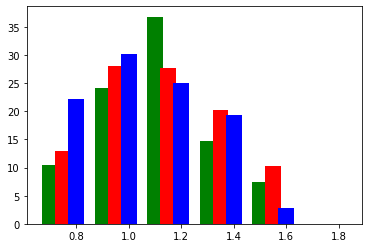

In [ ]:
Freq = [10.52631579, 24.21052632, 36.84210526, 14.73684211,  7.36842105, 0.]
Freq2 = [12.90153, 28.11527, 27.66761, 20.21617, 10.34227, 0.]
Freq3 = [22.22489, 30.15078, 25.10463, 19.30926, 2.810434, 0.]
barWidth = 0.25

br1 = range(len(Freq))
# Set position of bar on X axis
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
labels = [0.8, 1.0, 1.2, 1.4, 1.6, 1.8]

xx=[]
for a in labels:
  xx.append(str(a))
plt.bar(br1, Freq , color="green", align="center", width=0.3, tick_label= xx) 
plt.bar(br2, Freq2 , color="red", align="center", width=0.3, tick_label= xx)
plt.bar(br3, Freq3 , color="blue", align="center", width=0.3, tick_label= xx)

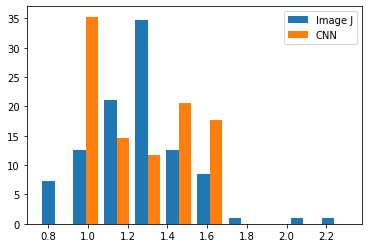

In [ ]:
 wt1 = np.ones(len(Diam1)) / len(Diam1)*100
 wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
 X = pd.DataFrame([Diam1,Diameter_All])
 wts = pd.DataFrame([wt1,wt2])
plt.hist(X,weights=wts)
plt.legend(['Image J','CNN'])

(array([[0.07368421, 0.2       , 0.41052632, 0.75789474, 0.88421053,
         0.96842105, 0.97894737, 0.97894737, 0.98947368, 1.        ],
        [0.        , 0.35294118, 0.5       , 0.61764706, 0.82352941,
         1.        , 1.        , 1.        , 1.        , 1.        ]]),
 array([0.75356807, 0.90995518, 1.06634229, 1.22272941, 1.37911652,
        1.53550363, 1.69189074, 1.84827785, 2.00466497, 2.16105208,
        2.31743919]),
 <a list of 2 Lists of Patches objects>)

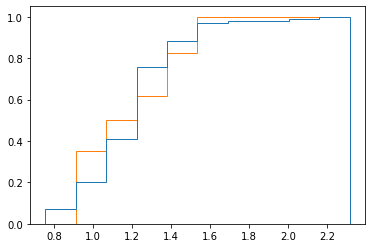

In [ ]:
# plt.hist(x, bins=bins, density=True, histtype='step', cumulative=-1,label='Reversed emp.')
plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')

r_squared = 0.9463553026765299


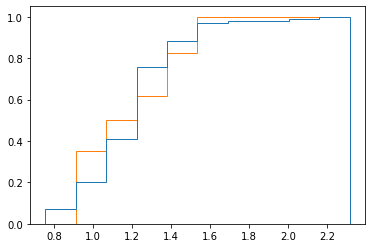

In [ ]:
Obj = plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')
Y1, Y2 = Obj[0]
Rsquared = r2_score(Y1, Y2)
print('r_squared =',Rsquared)

In [ ]:
acc_train = r.history['accuracy'][-1]
acc_test = r.history['val_accuracy'][-1]
loss_train = r.history['loss'][-1]
loss_test = r.history['val_loss'][-1]

In [ ]:
df = pd.DataFrame({'N1':N1, 'N2':N2,'R^2':Rsquared,
                   'acc train':acc_train,'acc test':acc_test,
                   'loss train':loss_train,'loss test':loss_test,
                   'Details':Description},
                  index= [0])


In [ ]:
df

,N1,N2,R^2,acc train,acc test,loss train,loss test,Details
0,20,20,0.946355,1.0,0.972789,0.000024,0.207611,"3 layers of Convolution: 64, 128, 256"


<a list of 2 Lists of Patches objects>
[0.75356807 0.90995518 1.06634229 1.22272941 1.37911652 1.53550363
 1.69189074 1.84827785 2.00466497 2.16105208 2.31743919]
[[ 7.36842105 12.63157895 21.05263158 34.73684211 12.63157895  8.42105263
   1.05263158  0.          1.05263158  1.05263158]
 [ 0.         35.29411765 14.70588235 11.76470588 20.58823529 17.64705882
   0.          0.          0.          0.        ]]


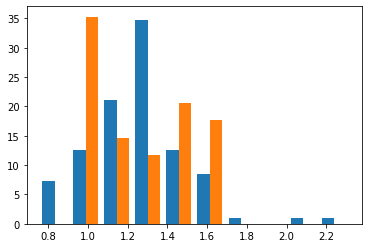

In [ ]:
counts, bins, bars = plt.hist(X,weights=wts)
print(bars)
print(bins)
print(counts)

In [ ]:
print(counts.sum())

200.00000000000003


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


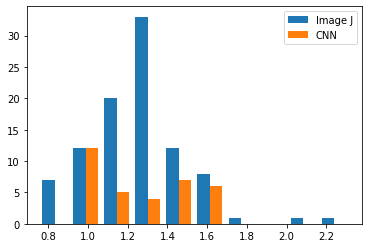

In [ ]:

plt.hist([Diam1,Diameter_All])
plt.legend(['Image J','CNN'])


In [ ]:
[Diam1,Diameter_All]

[[1.59616801403081,
  1.0217907939900581,
  1.2716187407449044,
  1.104429030701514,
  1.2163487785097904,
  1.6013445735058454,
  1.1715597420637607,
  1.2534662333717612,
  1.2676073151634049,
  1.309600575274104,
  1.292966945531582,
  1.7658322811231006,
  1.3564037533648712,
  1.2407040781688483,
  2.130217298173151,
  1.4228319915327,
  1.0651086490865755,
  1.3008210311003705,
  1.336545951796433,
  0.8927754224911278,
  1.4494292838262302,
  1.4052738287907582,
  1.6421697097891788,
  1.2329833804288621,
  1.19042665178928,
  1.1682948223612457,
  1.1518314137121108,
  0.9607802401865855,
  2.317439190074449,
  1.0591147430338594,
  1.4308630919602832,
  0.7535680705496237,
  0.8608283307581511,
  1.2776122636975893,
  1.3745862957220916,
  1.259546137598783,
  1.2978813187979172,
  1.2412170838050638,
  1.6009469708743893,
  1.3149369953539032,
  1.417901703622935,
  1.2478669653497139,
  1.1055812783082735,
  0.9561307405997607,
  0.9487783503683882,
  1.1238565871041026,
  1

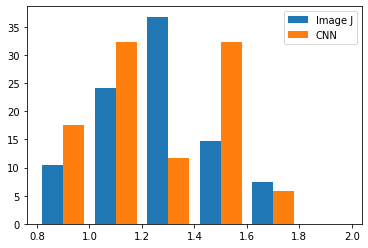

In [ ]:
 bins_list = [0.8, 1.0, 1.2, 1.4,1.6, 1.8,2.0]
 wt1 = np.ones(len(Diam1)) / len(Diam1)*100
 wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
 X = pd.DataFrame([Diam1,Diameter_All])
 wts = pd.DataFrame([wt1,wt2])
plt.hist(X,weights=wts,bins = bins_list)
plt.legend(['Image J','CNN'])

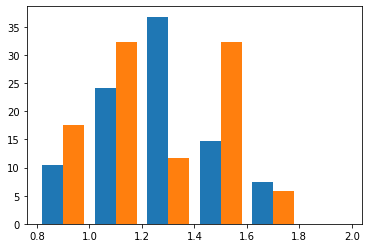

In [ ]:
yy = plt.hist(X,weights=wts,bins = bins_list)

In [ ]:
yy[0][0]

array([10.52631579, 24.21052632, 36.84210526, 14.73684211,  7.36842105,
        0.        ])

In [ ]:
bins_list

[0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]

In [ ]:
k =0
for kk in yy[0][0]:
  name = str(bins_list[k])
  df[name] = yy[0][1][k]
  k = k+1

In [ ]:
df

,N1,N2,R^2,acc train,acc test,loss train,loss test,Details,0.8,1.0,1.2,1.4,1.6,1.8
0,20,20,0.946355,1.0,0.972789,0.000024,0.207611,"3 layers of Convolution: 64, 128, 256",17.647059,32.352941,11.764706,32.352941,5.882353,0.0


In [ ]:
Arq = "output.xlsx"
df.to_excel(Arq)
files.download(Arq)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>